# Modal decomposition: find "normal" patterns of oscillating system
This TP is done by Chensheng Luo.

### Oscillation 
The **repetitive variation**, typically in time, of some measure **about a central value** (often a point of equilibrium) or between two or more different states.

The term ***vibration*** is precisely used to describe **mechanical oscillation**. Here some examples of impressive vibration phenomena:

### Tacoma Narrows Bridge: the "Galloping Gertie"
<img style='width: 600px; margin: 0px; float: left; border: 3px solid black;' src='images/tacoma-bridge.gif'/> 

### Molecular dynamics

Oscillations not only occur in mechanical systems but also in dynamic systems in virtually every area of science. For example, $CH_2$ group, commonly found in organic compounds, can vibrate in six different ways: symmetric and asymmetric stretching, scissoring, rocking, wagging and twisting as shown here:

<img style='width: 100px; margin: 0px; float: left; border: 2px solid black;' src="images/Symmetrical_stretching.gif">
<img style='width: 100px; margin: 0px; float: left; border: 2px solid black;' src="images/Asymmetrical_stretching.gif">
<img style='width: 100px; margin: 0px; float: left; border: 2px solid black;' src="images/Scissoring.gif">
<img style='width: 100px; margin: 0px; float: left; border: 2px solid black;' src="images/Wagging.gif">
<img style='width: 100px; margin: 0px; float: left; border: 2px solid black;' src="images/Twisting.gif">
<img style='width: 100px; margin: 0px; float: left; border: 2px solid black;' src="images/Rotation.gif">

## What is a"normal" mode?

A **normal mode** $\boldsymbol{u_n}$ of an oscillating system (bounded structure) is **mode is a standing state of excitation** defined by: 
+ **harmonic pattern** of motion
+ all parts move with the **same frequency** $f_n$ 
+ all parts move with a fixed phase relation

<img style='width: 400px; margin: 0px; float: left; border: 0px solid black;' src="images/natural-frequency.png">

<img style='width: 700px; margin: 0px; float: left; border: 0px solid black;' src="images/un-alpha.png">

## MDOF dynamics

See the theory in `MDOF_theory.pdf`

<img style='width: 800px; margin: 0px; float: left; border: 10px solid white;' src='images/mdof_scheme.png'> 

<img style='width: 700px; margin: 0px; float: left; border: 10px solid white;' src="images/mdof_eigen_eq.png"> 

# __Hands on session__

GRAPHS WITHOUT LEGENDS AND UNITS WILL NOT BE CONSIDERED!!

#### Setup

In [1]:
# Load fundamental modules
from math import sin
import numpy as np
from numpy.linalg import inv, norm
from scipy.linalg import eigh
from matplotlib import pyplot as plt
import cmath

In [2]:
# Set up properties
k = 1000. # stiffness
m = 1.0 # mass
dofs = 3 # number of dofs

# time vector
dt = 1.0e-2 # time step
dur = 80.0 # duration
vtm = np.arange(0.0,dur,dt) # time vector
ntm = vtm.size # number of time steps

# Compute the transfer function using the Fast Fourier Transform (use np.fft.rfft - https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html)
def next_power_of_2(x):  
    return 1 if x == 0 else 2**(x - 1).bit_length()

#### __[TASK #1] Compute Frequency Response Function__ [3/20 points]

Load the earthquake acceleration `seisme.txt` and the DOF displacements `q1.csv`, `q2.csv`, `q3.csv` referring to each DOF respectively. Each file contains two columns: the first one is the time vector, the second one the earthquake acceleration (for `seisme.txt`) and displacement (for `q1.csv`, `q2.csv`, `q3.csv`).

_Nota bene_: The `lambda` function is necessary to interpolate the external vectors on a generic time vector.

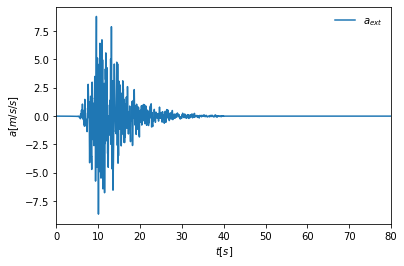

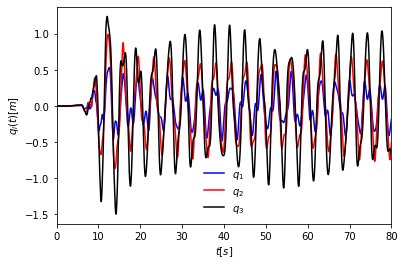

In [3]:
# earthquake input acceleration (inertial force)  [time (s),acceleration (m/s/s)]
eqk = np.loadtxt("seisme.txt")
aeq = lambda s: np.interp(s,eqk[:,0],eqk[:,1])
plt.ion()
plt.plot(vtm,aeq(vtm),label=r"$a_{ext}$")
plt.xlim(0.0,dur)
plt.xlabel(r'$t [s]$')
plt.ylabel(r'$a [m/s/s]$')
plt.legend(frameon=False)
plt.ioff()
plt.show()

# earthquake response q1 [time (s),displacement (m)]
eqk1 = np.genfromtxt("q1.csv",delimiter=',',dtype=np.float64)
q1 = lambda s: np.interp(s,eqk1[:,0],eqk1[:,1])

# earthquake response q2 [time (s),displacement (m)]
eqk2 = np.genfromtxt("q2.csv",delimiter=',',dtype=np.float64)
q2 = lambda s: np.interp(s,eqk2[:,0],eqk2[:,1])

# earthquake response q3 [time (s),displacement (m)]
eqk3 = np.genfromtxt("q3.csv",delimiter=',',dtype=np.float64)
q3 = lambda s: np.interp(s,eqk3[:,0],eqk3[:,1])

plt.ion()
plt.plot(vtm,q1(vtm),label=r'$q_1$',color='blue')
plt.plot(vtm,q2(vtm),label=r'$q_2$',color='red')
plt.plot(vtm,q3(vtm),label=r'$q_3$',color='black')
plt.xlim(0.0,dur)
plt.xlabel(r'$t [s]$')
plt.ylabel('$q_i(t) [m]$')
plt.legend(frameon=False)
plt.ioff()
plt.show()

* Compute the $FRF$ (Frequency Response Function) for all the DOFs displacements separately ($FRF_1$ for $q_1$, $FRF_2$ for $q_2$ and $FRF_3$ for $q_3$) wrt the input ground motion $a_{eq}(t)$

Answer:

In [4]:
# Compute the Frequency Response Function using the Fast Fourier Transform (use np.fft.rfft - https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html)
nfft = next_power_of_2(vtm.size)
dfq = 1/(dt*nfft)# Number of samples
vfq = np.arange(nfft/2+1)*dfq# List of frequency

# Fourier Transform of input signal(earthquake) and output signal
Inp = np.fft.rfft(aeq(vtm),nfft)
Out1 = np.fft.rfft(q1(vtm),nfft)
Out2 = np.fft.rfft(q2(vtm),nfft)
Out3 = np.fft.rfft(q3(vtm),nfft)

FRF1 = Out1/(Inp+1.0e-10)
FRF2 = Out2/(Inp+1.0e-10)
FRF3 = Out3/(Inp+1.0e-10)

* Plot the FRFs amplitude and identify the first three peaks (plot them on the figure): at which frequencies do those peaks correspond to?

Answer:

The first peak takes place at the frequency of f1= 0.27 Hz
The second peak takes place at the frequency of f2= 0.57 Hz
The third peak takes place at the frequency of f3= 0.81 Hz


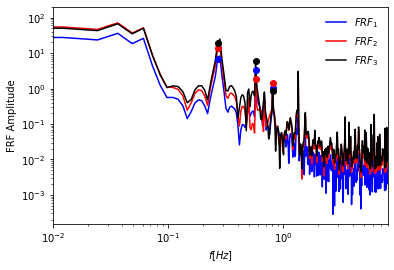

In [5]:
# Plot the FRFs amplitude
plt.loglog(vfq,abs(FRF1),label=r'$FRF_1$',color='blue')
plt.loglog(vfq,abs(FRF2),label=r'$FRF_2$',color='red')
plt.loglog(vfq,abs(FRF3),label=r'$FRF_3$',color='black')
plt.xlim(1e-2,8)
plt.xlabel(r'$f[Hz]$')
plt.ylabel(r'FRF Amplitude')
plt.legend(frameon=False)
plt.ioff()

# Plot the peaks, the index of 3 pics is counted by hand
f1=22;
print('The first peak takes place at the frequency of f1=',round(vfq[f1],2),'Hz')
plt.loglog(vfq[f1], abs(FRF1[f1]),'o',color='blue')
plt.loglog(vfq[f1], abs(FRF2[f1]),'o',color='red')
plt.loglog(vfq[f1], abs(FRF3[f1]),'o',color='black')
f2=47;
print('The second peak takes place at the frequency of f2=',round(vfq[f2],2),'Hz')
plt.loglog(vfq[f2], abs(FRF1[f2]),'o',color='blue')
plt.loglog(vfq[f2], abs(FRF2[f2]),'o',color='red')
plt.loglog(vfq[f2], abs(FRF3[f2]),'o',color='black')
f3=66;
print('The third peak takes place at the frequency of f3=',round(vfq[f3],2),'Hz')
plt.loglog(vfq[f3], abs(FRF1[f3]),'o',color='blue')
plt.loglog(vfq[f3], abs(FRF2[f3]),'o',color='red')
plt.loglog(vfq[f3], abs(FRF3[f3]),'o',color='black')
plt.show()

* Plot the FRFs phase and identify the frequencies corresponding to the peaks of the amplitude. What do you observe at these frequencies?

Answer:

At f1= 0.27 Hz, we have 3 phases are respectively 0.98 pi, 0.98 ,pi 0.98 pi.
At f2= 0.57 Hz, we have 3 phases are respectively 0.59 pi, 0.58 ,pi -0.41 pi.
At f3= 0.81 Hz, we have 3 phases are respectively 0.48 pi, -0.47 ,pi 0.49 pi.


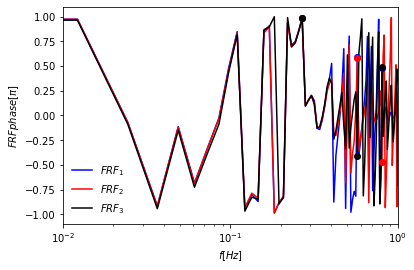

In [6]:
# Plot the FRFs phase
phase1=np.array([cmath.phase(i) for i in FRF1])
phase2=np.array([cmath.phase(i) for i in FRF2])
phase3=np.array([cmath.phase(i) for i in FRF3])
plt.xlim(1e-2,1)
plt.semilogx(vfq,phase1/np.pi,label=r'$FRF_1$',color='blue')
plt.semilogx(vfq,phase2/np.pi,label=r'$FRF_2$',color='red')
plt.semilogx(vfq,phase3/np.pi,label=r'$FRF_3$',color='black')
plt.xlabel(r'$f[Hz]$')
plt.ylabel(r'$FRF phase[\pi]$')
plt.legend(frameon=False)
plt.ioff()

# Plot the peaks, and calculate the correspinding phase.
f1=22;
print('At f1=',round(vfq[f1],2),'Hz, we have 3 phases are respectively', round(phase1[f1]/np.pi,2),'pi,',round(phase2[f1]/np.pi,2),',pi',round(phase3[f1]/np.pi,2),'pi.')
plt.semilogx(vfq[f1], phase1[f1]/np.pi,'o',color='blue')
plt.semilogx(vfq[f1], phase2[f1]/np.pi,'o',color='red')
plt.semilogx(vfq[f1], phase3[f1]/np.pi,'o',color='black')

f2=47;
print('At f2=',round(vfq[f2],2),'Hz, we have 3 phases are respectively', round(phase1[f2]/np.pi,2),'pi,',round(phase2[f2]/np.pi,2),',pi',round(phase3[f2]/np.pi,2),'pi.')
plt.semilogx(vfq[f2], phase1[f2]/np.pi,'o',color='blue')
plt.semilogx(vfq[f2], phase2[f2]/np.pi,'o',color='red')
plt.semilogx(vfq[f2], phase3[f2]/np.pi,'o',color='black')

f3=66;
print('At f3=',round(vfq[f3],2),'Hz, we have 3 phases are respectively', round(phase1[f3]/np.pi,2),'pi,',round(phase2[f3]/np.pi,2),',pi',round(phase3[f3]/np.pi,2),'pi.')
plt.semilogx(vfq[f3], phase1[f3]/np.pi,'o',color='blue')
plt.semilogx(vfq[f3], phase2[f3]/np.pi,'o',color='red')
plt.semilogx(vfq[f3], phase3[f3]/np.pi,'o',color='black')

**Answer-Explanation:** We can see that, at the peak of each frequency, the correspoding phase are about $\frac{n}{2} \pi$.

* Can you relate the peak corresponding to the lowest frequency to the number of DOFs?

Answer:

In [7]:
f1_theory=5/dofs/(np.pi*2)
print('In theory, first pic take place at the frequency of f1t=',round(f1_theory,2),'Hz')
print('In our calculate, it takes place at f1=',round(vfq[f1],2),'Hz')
print('We can find a coincidence between this two frequencies.')

In theory, first pic take place at the frequency of f1t= 0.27 Hz
In our calculate, it takes place at f1= 0.27 Hz
We can find a coincidence between this two frequencies.


#### MDOF

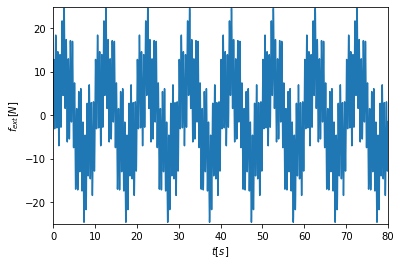

In [8]:
# External loads (inertial forces)

Aext1 = 5.0 # amplitude external load 1 [N]
Aext2 = 10.0 # amplitude external load 2 [N]
Aext3 = 10.0 # amplitude external load 3 [N]

Text1 = 2.0 # period of external force 2.0
Text2 = 10.0 # period of external force 10.0
Text3 = 0.5 # period of external force 0.5
fext = lambda s: Aext1*np.sin(2.0*np.pi*s/Text1)+Aext2*np.sin(2.0*np.pi*s/Text2)+Aext3*np.sin(2.0*np.pi*s/Text3)
plt.ion()
plt.plot(vtm,fext(vtm))
plt.xlim(0.0,dur)
plt.xlabel(r'$t [s]$')
plt.ylim(-(Aext1+Aext2+Aext3),(Aext1+Aext2+Aext3))
plt.ylabel(r'$f_{ext}[N]$')
plt.ioff()
plt.show()

In [9]:
# Mass matrix
m1 = 300.*m
m2 = 200.*m
m3 = 100.*m
M = np.array([[m1,0,0],[0,m2,0],[0,0,m3]])

# Stiffness matrix
k1 = 3.*k
k2 = 2.*k
k3 = 1.*k
K = np.array([[k1+k2,-k2,0],[-k2,k2+k3,-k3],[0,-k3,k3]])

# External force
Fext = lambda s: fext(s)*np.ones((3,))

#### __[TASK #2] Find eigen-modes__  [3/20 points]

* Find the eigen modes of the dynamic system. What are the natural frequencies?

Answer:

In [10]:
# find natural frequencies and mode shapes (https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigh.html)
# Hint: call evecs and evals the eigen-vectors and eigen-values respectively. Compute natural frequencies

[evals,evecs]=eigh(K,M)
evecs=evecs.T
frequencies=np.sqrt(evals)/2/np.pi # Change to frequency
evecs=np.array([evecs[i]/norm(evecs[i]) for i in range(3)]) # Normalize eigen vectors
print('Natural frequencies are : f1 = {0} Hz, f2 = {1} Hz, f3 = {2} Hz '.format(*tuple(frequencies.round(2).tolist())))
print('Mode shapes are : l1 = {0}, l2 = {1}, l3 = {2} '.format(*tuple(evecs.round(2).tolist())))

Natural frequencies are : f1 = 0.28 Hz, f2 = 0.57 Hz, f3 = 0.81 Hz 
Mode shapes are : l1 = [-0.27, -0.55, -0.79], l2 = [0.47, 0.26, -0.84], l3 = [-0.53, 0.71, -0.46] 


  We can find that these natural frequencies are almost the same as what we've found

* Plot the eigen vectors of the system. At what do they correspond to?

Answer:

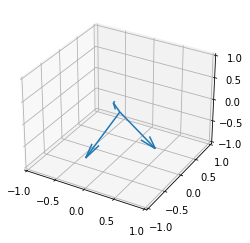

In [11]:
U, V, W = zip(*evecs)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver([0,0,0],[0,0,0], [0,0,0], U, V, W, normalize=True)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
plt.show()

* Compute the _modal masses_ analytically and numerically:

*Nota bene*: the `scipy` function `eigh` normalizes the eigenvector as:

$$              \boldsymbol{K} . \boldsymbol{\phi}_i = ω^2 \cdot \boldsymbol{M} . \boldsymbol{\phi}_i$$

The corresponding `python` code:

```
              K @ vi = λ * M @ vi
```
with:

$$\lambda = \omega_i^2$$

Answer:

*Formula:*

 For each $n =1,2,3$, we have the corresponding modal mass: $m_n=\phi_n^T M \phi_n$ with $\phi_n$ the eigen vector.

In [12]:
# Compute modal Masses
mM = [evecs[i].conj().T @ M @ evecs[i] for i in range(3)]# np.dot(np.transpose(evecs[i]),np.dot(M,evecs[i]))
print("Modal mass 1: {:>.2f} kg".format(mM[0]))
print("Modal mass 2: {:>.2f} kg".format(mM[1]))
print("Modal mass 3: {:>.2f} kg".format(mM[2]))

Modal mass 1: 145.07 kg
Modal mass 2: 151.13 kg
Modal mass 3: 207.32 kg


* How many modes do you need to reconstruct the system response with at least 80\% of the total mass? Which ones?

Answer:  3, there is not a mode which is dominated.

In [13]:
mass_chosen=(mM[1]+mM[2])
mass_min=(m1+m2+m3)*0.8
print("The sum of two biggest masses are",round(mass_chosen,2),'kg, while 80% of total mass are',round(mass_min,2),'kg, we need thus 3 modes.')

The sum of two biggest masses are 358.45 kg, while 80% of total mass are 480.0 kg, we need thus 3 modes.


#### __[TASK #3] Reconstruct the modal response__  [3/20 points]

* Solve the SDOF problem for each eigen-mode, in order to find the modal amplitudes $\alpha_n(t)$

_Nota Bene_:

The second order equation $y''(t)= a y'(t)+ b y(t) + c(t)$ can be rewritten as a system:

(1)   $y'(t) = z(t)$

(2)   $z'(t) = a z(t) + b y(t) + c(t)$

In this case, $a=0$ and $b=-\boldsymbol{M^{-1}.K}$.

The final first-order ordinary differential system of equations reads: 

$$\boldsymbol{X}'(t)=\boldsymbol{A.X(t)}+\boldsymbol{b}(t)$$

with $X(t)=\begin{bmatrix} \boldsymbol{q}(t)\\ \boldsymbol{q}'(t) \end{bmatrix}$ and $A=\begin{bmatrix} \boldsymbol{0} & \boldsymbol{I} \\  -\boldsymbol{M^{-1}.K} & \boldsymbol{0} \end{bmatrix}$ and with $\boldsymbol{b}(t)=\begin{bmatrix}0 \\ c(t)\end{bmatrix}$

Answer:

We should remark that the modal generalised force is defined by $f_n=\underline{\phi_n}^T \underline{F_{ext}}$.   
Since $\underline{\phi_n}$=```evecs[n]```, $ \underline{F_{ext}}$=```Fext(t)```. We have $f_n=\underline{\phi_n}^T \underline{F_{ext}}$=```Fext(t) @ evecs[n]``` and $c(t)=\frac{f_n}{M}$

In [14]:
# Hint: use the scipy function solve_ivp (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)
from scipy.integrate import solve_ivp
mK = [evecs[i].conj().T @ K @ evecs[i] for i in range(3)]
omega=np.array([np.sqrt(mK[n]/mM[n]) for n in range(3)])

# Initial conditions
y0 = np.zeros((1,))
z0 = np.zeros((1,))
X0 = np.concatenate([y0,z0])

def solve2ndOrderODE(t,X,n,xi):
    # with extra arguments:
    # n = number of mode
    # xi = damping coefficient
    x,y=X
    omega=np.sqrt(mK[n]/mM[n])
    return np.array([y,-omega*omega*x-2*xi*omega*y])+np.array([0,Fext(t) @ evecs[n]/mM[n]]) 

Text(0.5, 0, '$t [s]$')

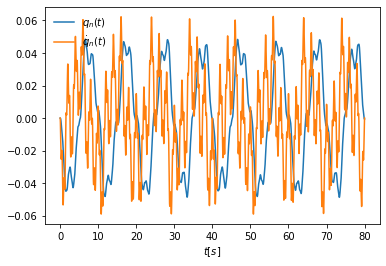

In [15]:
alpha1 = solve_ivp(solve2ndOrderODE,(0,dur),X0,t_eval=vtm,args=(0,0))
plt.plot(alpha1.t,alpha1.y.T)
plt.legend([r'$q_n(t)$',r'$\dot{q}_n(t)$'],frameon=False)
plt.xlabel(r'$t [s]$')

Text(0.5, 0, '$t [s]$')

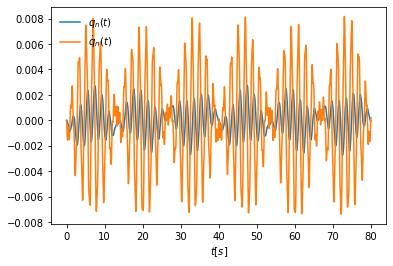

In [16]:
alpha2 = solve_ivp(solve2ndOrderODE,(0,dur),X0,t_eval=vtm,args=(1,0))
plt.plot(alpha2.t,alpha2.y.T)
plt.legend([r'$q_n(t)$',r'$\dot{q}_n(t)$'],frameon=False)
plt.xlabel(r'$t [s]$')

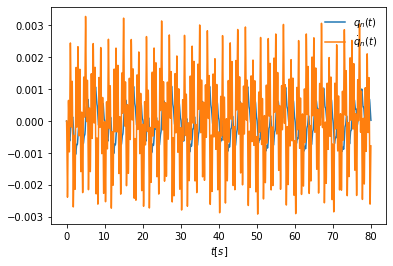

In [17]:
alpha3 = solve_ivp(solve2ndOrderODE,(0,dur),X0,t_eval=vtm,args=(2,0))
plt.plot(alpha3.t,alpha3.y.T)
plt.legend([r'$q_n(t)$',r'$\dot{q}_n(t)$'],frameon=False)
plt.xlabel(r'$t [s]$')
plt.show()

* Compute and plot the _response spectrum_ for each modal amplitude $\alpha_i$:

$$S_d(\alpha_i)=\max_{t}\vert \alpha_i(t)\vert$$

and plot the values as a function of the associated natural frequency.

Answer:

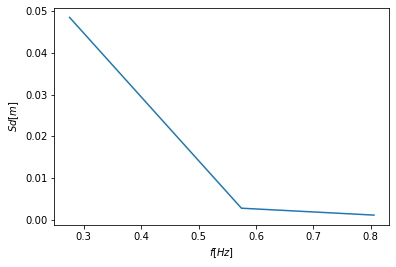

In [18]:
Sd1=max(alpha1.y[0])
Sd2=max(alpha2.y[0])
Sd3=max(alpha3.y[0])
plt.plot(frequencies,[Sd1,Sd2,Sd3])
plt.xlabel(r'$f[Hz]$')
plt.ylabel(r'$Sd[m]$')
plt.show()

Which mode dominates the transient response and why?

Answer:

As we can see, the 1st mode dominates the transient response. It's responable as the modal mass of this mode is smallest and the stiffness of this mode is the biggest. As a result, the corresponding $\omega_n$ is the smallest, thus the result has a highest amplitude.

#### __[TASK #4] Compute transfer function__  [3/20 points]

For each mode, the transfer function $\hat{H}_n(\omega)$ reads:

$$\hat{\boldsymbol{H}}(\omega)=\sum_n H_n(\omega)\boldsymbol{\phi}_n\otimes\boldsymbol{\phi}_n$$

* Compute the transfer function of the whole MDOF

Answer:

In [19]:
# Compute the transfer function using the Fast Fourier Transform (use np.fft.rfft - https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html)

noise_tolerance=10000
def computeTF(sol,n,xi):
    nfft = next_power_of_2(vtm.size)
    dfq = 1/(dt*nfft)# Number of samples
    vfq = np.arange(nfft/2+1)*dfq# List of frequency

    # Fourier Transform of input signal and output signal
    Inp = np.fft.rfft(np.dot([Fext(t) for t in vtm],evecs[n]),nfft)
    Out = np.fft.rfft(sol.y[0],nfft)
    H=Out/(Inp+1e-10)
    
    # To filte the noise of fourier transform
    H[0]=H[1]
    for i in range(1,H.shape[0]):
        if np.abs(H[i]/H[i-1])>noise_tolerance:
            H[i]=H[i-1]
    return vfq,H
    

vfq1,H1 = computeTF(alpha1,0,0.0)
vfq2,H2 = computeTF(alpha2,1,0.0)
vfq3,H3 = computeTF(alpha3,2,0.0)

* Plot the transfer function and the eigen frequencies previously identified. What do you observe?

Answer:

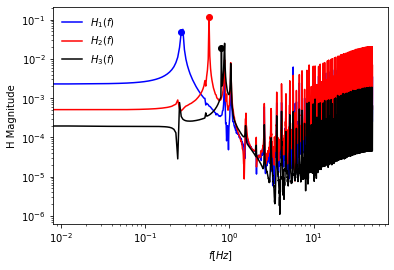

In [20]:
plt.loglog(vfq1,np.abs(H1),color='blue',label=r'$H_1(f)$')
plt.loglog(vfq2,np.abs(H2),color='red',label=r'$H_2(f)$')
plt.loglog(vfq3,np.abs(H3),color='black',label=r'$H_3(f)$')

plt.xlabel(r'$f[Hz]$')
plt.ylabel(r'H Magnitude')
plt.legend(frameon=False)
plt.ioff()

f1=(int)(frequencies[0]/dfq);
plt.loglog(vfq1[f1], abs(H1[f1]),'o',color='blue')

f2=(int)(frequencies[1]/dfq);
plt.loglog(vfq2[f2], abs(H2[f2]),'o',color='red')

f3=(int)(frequencies[2]/dfq);
plt.loglog(vfq3[f3], abs(H3[f3]),'o',color='black')

plt.show()

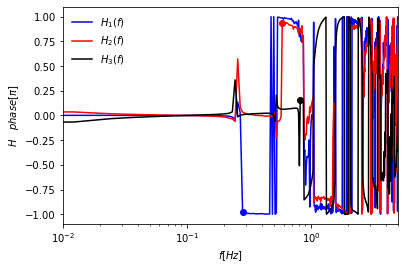

In [21]:
phase1=np.array([cmath.phase(i) for i in H1])
phase2=np.array([cmath.phase(i) for i in H2])
phase3=np.array([cmath.phase(i) for i in H3])

plt.semilogx(vfq1,phase1/np.pi,color='blue',label=r'$H_1(f)$')
plt.semilogx(vfq2,phase2/np.pi,color='red',label=r'$H_2(f)$')
plt.semilogx(vfq3,phase3/np.pi,color='black',label=r'$H_3(f)$')
plt.xlim(1e-2,5)
plt.xlabel(r'$f[Hz]$')
plt.ylabel(r'$H \quad phase[\pi]$')
plt.legend(frameon=False)
plt.ioff()

f1=(int)(frequencies[0]/dfq+1);
plt.semilogx(vfq1[f1],phase1[f1]/np.pi,'o',color='blue')

f2=(int)(frequencies[1]/dfq+1);
plt.semilogx(vfq2[f2],phase2[f2]/np.pi,'o',color='red')

f3=(int)(frequencies[2]/dfq+1);
plt.semilogx(vfq3[f3],phase3[f3]/np.pi,'o',color='black')
plt.show()

**Explanation:**

We can find out that the eigen frequencies are the resonance frequencies of corresponding transfert function, where we can observe:
- a biggest magnitude(a pic)
- a change of slope in magnitude graph from 0 dB/decades to -40dB/decades
- a reverse of phase.   

It's natural with the definition of 2nd order SDOF transfert function(without damping), as the resonance take place at the natural frequency.

#### __[TASK #5] Response to a random load (wind)__  [5/20 points]

We study the main characteristics of the wind loading. The horizontal velocity of the wind is modeled here in the following way:

$$V(t) = \mu_V\cdot(1+\beta(t))$$

where $\beta(t)$ is a centered gaussian random process, with a given Power Spectral Density $S_V(f)$ (with $f$ being the frequency, in Hz), and $\mu_V$ = 100 km/h. The velocity field is therefore random and $S_V(f)$ reads:

$$ S_V(f) = \frac{4\kappa\cdot \mu_V\cdot L}{\left(2+\left(\frac{L\cdot f}{\mu_V} \right)^2\right)^{\frac{5}{6}} }$$

with $\kappa$ and $L$ two constants.

* Plot the spectrum $S_V(f)$ as a function of $f$ (both phase and amplitude!). What are the mathematical properties of this Power Spectral Density?

_Nota Bene_: use the frequency vector employed in the previous steps, considering the time vector `vtm` as time domain of reference.

Answer: 

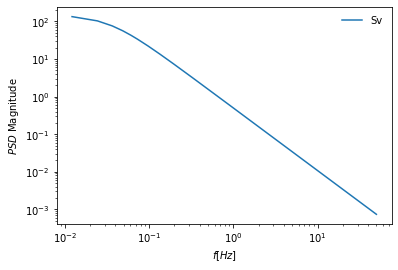

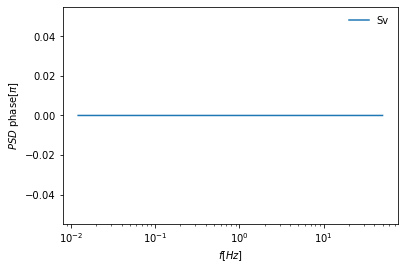

In [22]:
muV = 1.0e5/3600.0 # mean velocity at 10m height: 100 km/h
kappa = 0.002 # constant
Lcar = 1200.0 # constant

nfft = next_power_of_2(vtm.size)
dfq = 1/(dt*nfft)# Number of samples
vfq = np.arange(nfft/2+1)*dfq# List of frequency
vfq[0]=dfq

Sv = 4*kappa*muV*Lcar/pow(2+pow(Lcar*vfq/muV,2),5/6)


plt.loglog(vfq,abs(Sv),label='Sv')
plt.xlabel(r'$f[Hz]$')
plt.ylabel(r'$PSD$ Magnitude')
plt.legend(frameon=False)
plt.show()

phaseSv=np.array([cmath.phase(i) for i in Sv])
plt.semilogx(vfq,phaseSv/np.pi,label='Sv')
plt.xlabel(r'$f[Hz]$')
plt.ylabel(r'$PSD$ phase$[\pi]$')
plt.legend(frameon=False)
plt.show()

**Explanation**: We can see that the spectrum is also centered gaussian and it's real(with phase=0)

In order to generate a plausible realization of the wind velocity field $\beta_j(t)$, the following formula is adopted:

$$ \beta_j(t) = 2\cdot\sqrt{\frac{2}{\pi}}\cdot \sum_{k=1}^{N_f} \sqrt{2\cdot\pi\cdot S(f_k)\cdot \Delta f }\cdot \rho_j \cdot\cos\left( 2\pi f_k t -2\pi\phi_j\right)$$

with:
 - $\Delta f$ : frequency step
 - $N_f$: number of frequency points 
 - $\rho_j=\vert a+i\cdot b \vert$: $j^{\text{th}}$-realization of the random variable $\rho$ with $a\sim\mathcal{N}(0,1)$ and $b\sim\mathcal{N}(0,1)$
 - $\phi_j$: $j^{\text{th}}$-realization of the random variable $\rho\sim\mathcal{U}(0,1)$

* Generate $N_s$ samples of wind velocity field

Answer: **ATTENTION! FORMULA DISCUTABLE!**

In [23]:
# Hint: Use the numpy random number generator https://numpy.org/doc/stable/reference/random/index.html
Ns = 10 # number of wind samples
velocitys=np.empty(shape=(0,len(vtm)),dtype=float)
betas=np.empty(shape=(0,len(vtm)),dtype=float)
for i in range(Ns):
    somme = np.zeros((len(vtm),),dtype=float)
    rho=abs(complex(np.random.default_rng().normal(0, 1, 1), np.random.default_rng().normal(0, 1, 1)))
    phi=np.random.default_rng().uniform(0, 1, 1)
    for k in range(1,(int)(nfft/2+1)):
        somme = np.sqrt(1/2/np.pi*Sv[k]*dfq)*rho*np.cos(2*np.pi*vfq[k]*vtm-2*np.pi*phi)+somme
    betaj=2*np.sqrt(2/np.pi)*somme
    velocityj=(betaj+1)*muV
    betas=np.append(betas,[betaj],axis=0)
    velocitys=np.append(velocitys,[velocityj],axis=0)

* Plot the $N_s$ realizations on a single graph

Answer:

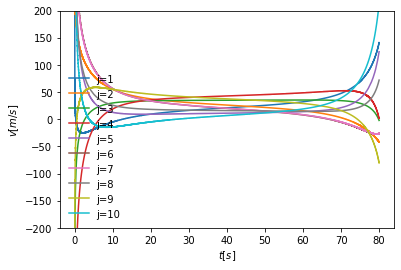

In [29]:
for i in range(Ns):
    plt.plot(vtm,velocitys[i],label='j='+str(i+1))
plt.xlabel(r'$t[s]$')
plt.ylabel(r'$v[m/s]$')
plt.ylim(-200,200)
plt.legend(frameon=False)
plt.show()

* Compute the Fourier's transform of each realization and plot them on a single graph

Answer:

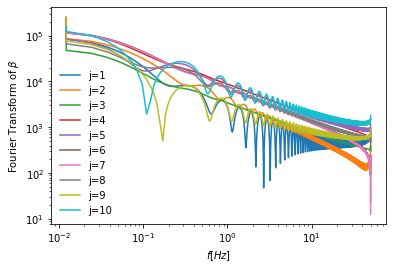

In [30]:
for i in range(Ns):
    ft=np.fft.rfft(velocitys[i],nfft)
    plt.loglog(vfq,abs(ft),label='j='+str(i+1))
plt.xlabel(r'$f[Hz]$')
plt.ylabel(r'Fourier Transform of $\beta$')
plt.legend(frameon=False)
plt.show()

The pressure $p$ applied by the wind on a given surface can be related to the square of the velocity through the formula:

$$ p(t)=\frac{1}{2}\rho_aC_D V^2(t)$$

with $\rho_a$=1.2 kg/m$^3$ being the unit mass density of the air

However, in practice a linearized formula for the pressure field is adopted hereafter.

* Compute the linearized expression of the pressure field, considering small fluctuations $\beta(t)\ll 1$

Answer:

We can say that $(1+\beta)^2 \sim 1+2 \beta$ so we have $p(t)=\frac{1}{2}\rho_a C_D \mu_V^2+\rho_a C_D\mu_V^2\beta(t)$.

* Compute several samples of the pressure field, evaluate its power spectrum $S_p(f)$ and compare them with the theoretical spectrum:

$$S_p(f)=4\left(\frac{\mu_p}{\mu_V}\right)^2 S_V(f)$$

where $\mu_p$ is the mean pressure.

Answer:

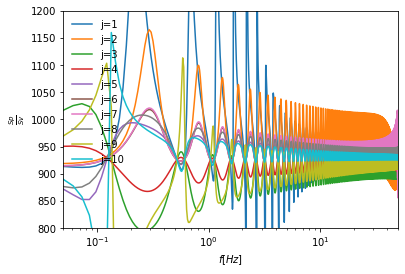

In [31]:
rhoa=1.2
Cd=1
ps=1/2*rhoa*Cd*muV*muV*(1+2*betas)

for i in range(Ns):
    ftbetas=np.fft.rfft(betas[i],nfft)
    ftps=np.fft.rfft(ps[i],nfft)
    plt.semilogx(vfq,abs(ftps/ftbetas),label='j='+str(i+1))
plt.xlim([5e-2,50])
plt.ylim([800,1200])
plt.xlabel(r'$f[Hz]$')
plt.ylabel(r'$\frac{Sp}{Sv}$')
plt.legend(frameon=False)
plt.show()

**Explanation:** As we can see, $\frac{S_p}{S_v}=4\left(\frac{\mu_p}{\mu_V}\right)^2=925$, so that $\mu_p=15\mu_V$ with SI system.

Considering the MDOF system as a building, with each floor corresponding to a DOF and the height of each floor of $H$= 2 m and width $W$ = 1 m

* Compute the random load `frdm` (the whole $N_s$ realizations of wind pressure values!) at each floor/dof:

Answer:

In [32]:
H=2
W=1
frdm=H*W*ps

* Convolve the random acceleration `frdm` with the computed transfer function (consider the mass!)

Answer: 

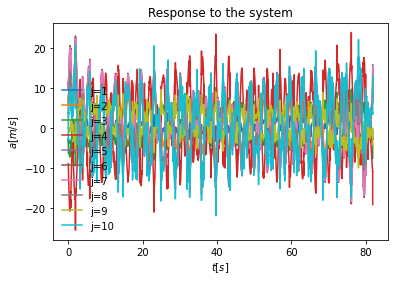

In [33]:
# Compute the transfer function using the Fast Fourier Transform (use np.fft.rfft - https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html)
ndt = 1/(dfq*nfft)# Number of samples
nvtm = np.arange(nfft)*ndt# List of time
for i in range(Ns):
    load=np.fft.rfft(frdm[i],nfft)
    response1=np.fft.irfft(load*H1)
    response2=np.fft.irfft(load*H2)
    response3=np.fft.irfft(load*H3)
    answer=(response1*mM[0]+response2*mM[1]+response3*mM[2])/(mM[0]+mM[1]+mM[2]) # Weighted mean by mass
    plt.plot(nvtm,answer,label='j='+str(i+1))
plt.xlabel(r'$t[s]$')
plt.ylabel(r'$a[m/s]$')
plt.legend(frameon=False)
plt.title('Response to the system')
plt.show()  

#### __[TASK 6 -BONUS] Time-marching Integration__  [3/20 points]

<img style='width: 800px; margin: 0px; float: left; border: 10px solid white;' src='images/Newmark_scheme.png'> 

In [34]:
# Newmark coefficients
gamma = 0.5
beta = (gamma+0.5)**2/4

* Compute the Newmark approximation in displacement, velocity and acceleration approaches

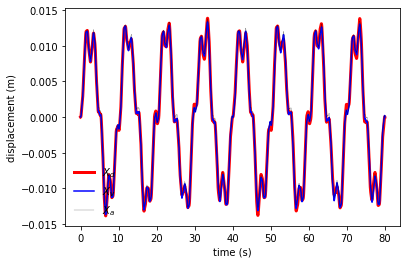

In [35]:
# displacement approach
Ad = (M+beta*dt*dt*K)/(beta*dt*dt)
# velocity approach
Av = (M+beta*dt*dt*K)/(gamma*dt)
# acceleration approach
Aa = (M+beta*dt*dt*K)

# Initialize solutions
Xd = np.zeros((3,ntm+1))
Xv = np.zeros((3,ntm+1))
Xa = np.zeros((3,ntm+1))

Und = np.zeros((3,ntm+1))
Vnd = np.zeros((3,ntm+1))
And = np.zeros((3,ntm+1))

Unv = np.zeros((3,ntm+1))
Vnv = np.zeros((3,ntm+1))
Anv = np.zeros((3,ntm+1))

Una = np.zeros((3,ntm+1))
Vna = np.zeros((3,ntm+1))
Ana = np.zeros((3,ntm+1))

# numerically integrate the EOMs
for n in range(1,ntm):
    # displacement approach
    # prediction
    pUnd = Und[:,n-1]+dt*Vnd[:,n-1]+dt*dt*(1/2-beta)*And[:,n-1]
    pVnd = Vnd[:,n-1]+dt*(1-gamma)*And[:,n-1]
    
    Bdn = Fext(vtm[n])+1/(beta*dt*dt)*M@pUnd
    Xd = np.linalg.solve(Ad,Bdn)
    Und[:,n] = Xd
    And[:,n] = (Xd-pUnd)/beta/dt/dt
    Vnd[:,n] = (Xd-pUnd)/beta/dt/dt*gamma*dt+pVnd
    
    # velocity approach
    # prediction
    pUnv = Unv[:,n-1]+dt*Vnv[:,n-1]+dt*dt*(1/2-beta)*Anv[:,n-1]
    pVnv = Vnv[:,n-1]+dt*(1-gamma)*Anv[:,n-1]
    
    Bvn = Fext(vtm[n])-K@pUnv+1/gamma/dt*M@pVnv
    Xv = np.linalg.solve(Av,Bvn)
    Vnv[:,n] = Xv
    Anv[:,n] = (Xv-pVnv)/gamma/dt
    Unv[:,n] = (Xv-pVnv)/gamma/dt*beta*dt*dt+pUnv
    
    # acceleration approach
    # prediction
    pUna = Una[:,n-1]+dt*Vna[:,n-1]+dt*dt*(1/2-beta)*Ana[:,n-1]
    pVna = Vna[:,n-1]+dt*(1-gamma)*Ana[:,n-1]
    Ban = Fext(vtm[n])-K@pUnv
    Xa = np.linalg.solve(Aa,Ban)
    Ana[:,n] = Xa
    Vna[:,n] = pVna+gamma*dt*Xa
    Una[:,n] = pUna+beta*dt*dt*Xa

# plot results
#time = [round(t,5) for t in np.arange(0, end_time, time_step) ]
plt.plot(vtm,Und[0,1:],color='red',linewidth=3)
plt.plot(vtm,Unv[0,1:],color='blue',linewidth=1.5)
plt.plot(vtm,Una[0,1:],color='black',linewidth=0.2)

plt.xlabel('time (s)')
plt.ylabel('displacement (m)')
plt.legend([r'$X_d$', r'$X_v$', r'$X_a$'],frameon=False)
plt.show()

### References
P. Le Tallec (2000) *Introduction à la dynamique des structures*. In *Les cours de l'Ecole Polytechnique* 220 pages.
(https://www.amazon.fr/Introduction-dynamique-structures-Patrick-Tallec/dp/2729879943)

J.H. Argyris, H.-P. Mlejnek (1991) *Dynamics of Structures*. ELSEVIER SCIENCE & TECHNOLOGY